Loaded a single grid cell as a text file | Alternatively can load multiple grid cells as netCDF file

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [14]:
thw = np.loadtxt('thw_new.txt')
mhw = np.loadtxt('mhw_new.txt')

In [12]:
thw_da = xr.open_dataarray('thw_new.nc')
mhw_da = xr.open_dataarray('mhw_new.nc')
combined_da = xr.open_dataarray('combined.nc')

## Proportion of co-occurring events over non co-occurring events 

In [44]:
add = mhw+thw
co_occ = sum(add==2)
non_co_occ = sum(thw==1) - co_occ
prop = co_occ/non_co_occ
prop

0.4092664092664093

In [38]:
proportion = []
for n in range (10000):
    thw_rand = np.random.permutation(thw)
    add = mhw+thw_rand
    co_occ = sum(add==2)
    non_co_occ = sum(thw_rand==1) - co_occ
    prop_rand = co_occ/non_co_occ
    proportion.append(prop_rand)

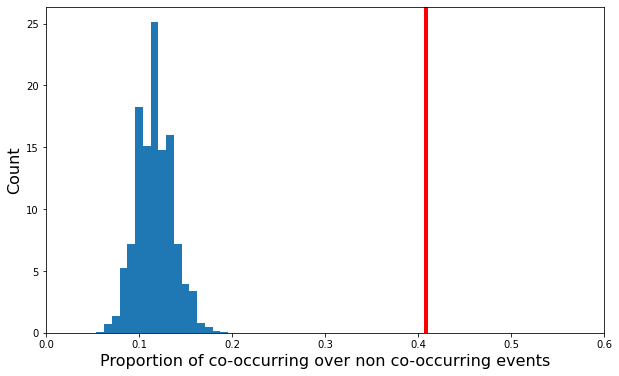

In [40]:
import scipy.stats as st
fig, ax = plt.subplots(figsize=(10,6)) 
plt.hist(proportion, density=True, bins=20, label="Proportion of THWs with co-occurring MHWs")
plt.xlim(xmin=0, xmax = 0.6)
plt.axvline(x=0.409, color='r', linewidth=4)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Proportion of co-occurring over non co-occurring events', fontsize=16)

plt.savefig('mc-single-gridpoint-2')

In [42]:
prop_calc = np.asarray(proportion)

In [43]:
from scipy.stats import norm
pdf = norm.pdf(prop_calc)
prob = pdf/pdf.sum()

mu = prop_calc.dot(prob)
mom2 = np.power(prop_calc, 2).dot(prob)
var = mom2 - mu**2
sd = np.sqrt(var)
sd

0.01975004831531967

In [45]:
difference = prop/sd
difference

20.722299142374784

## Proportion of THWs with co-occurring MHWs

In [28]:
add = mhw+thw
a = sum(mhw==1)
c = sum(add==2)
prop_thw_mhw = c/a

In [29]:
prop_thw_mhw

0.07528409090909091

In [21]:
proportion_rand = []
for n in range (10000):
    mhw_rand = np.random.permutation(mhw)
    thw_rand = np.random.permutation(thw)
    add = mhw_rand+thw_rand
    a = sum(mhw_rand==1)
    c = sum(add==2)
    prop_rand = c/a
    proportion_rand.append(prop_rand)

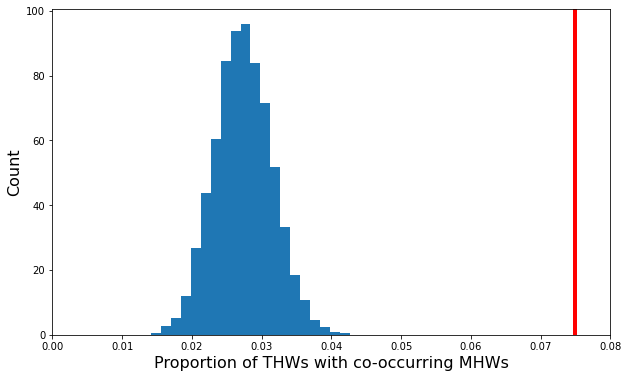

In [23]:
import scipy.stats as st
fig, ax = plt.subplots(figsize=(10,6)) 
plt.hist(proportion_rand, density=True, bins=20, label="Proportion of THWs with co-occurring MHWs")
plt.xlim(xmin=0, xmax = 0.08)
plt.axvline(x=0.075, color='r', linewidth=4)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Proportion of THWs with co-occurring MHWs', fontsize=16)

plt.savefig('thw-co-mhw')

In [49]:
proportion_rand_array = np.asarray(proportion_rand)

In [50]:
from scipy.stats import norm 
pdf = norm.pdf(proportion_rand_array)
prob = pdf/pdf.sum()

In [51]:
mu = proportion_rand_array.dot(prob)
mom2 = np.power(proportion_rand_array, 2).dot(prob)
var = mom2 - mu**2
sd = np.sqrt(var)
sd

0.004105763915803442

In [52]:
difference = prop_thw_mhw/sd
difference 

18.33619576111425